In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

(80, 2)


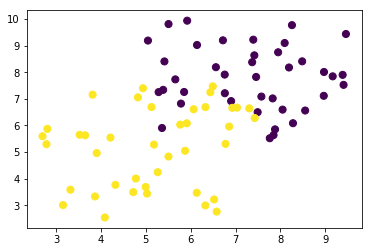

In [267]:
x0 = (np.random.rand(40,2)+1)*5
x1 = (np.random.rand(40,2)+0.5)*5
xtr = np.concatenate((x0,x1),axis=0)
print (xtr.shape)
ytr = np.array([0]*40+[1]*40)
plt.scatter(xtr[:,0],xtr[:,1],s=50,c=y)
plt.show()

In [268]:
def lwlr(xtr,ytr,xt,tau):
    m,n=xtr.shape
    theta=np.zeros(n)
    w=np.exp(-np.sum((xtr-xt)**2,axis=1)/(2*tau))
    #print ((xtr-xt).shape)
    #print(w.shape)
    d = np.ones(n)
    while(np.linalg.norm(d)>1e-6):
        h = 1.0 / (1+np.exp(-xtr.dot(theta)))
        #print (h)
        #print (h.shape)
        #print (xtr.dot(theta).shape)
        #print (h.shape)
        #print ((ytr-h).shape)
        #print ((w*(ytr-h)).shape)
        #print ((xtr.T).shape)
        #print (xtr.T.dot(w*(ytr-h)).shape)
        d = xtr.T.dot(w*(ytr-h))-(1e-4)*theta
        #print (d.shape)
        #print ((np.diag(-w*h*(1-h))).shape)
        H = (xtr.T.dot(np.diag(-w*h*(1-h)))).dot(xtr)-(1e-4)*np.identity(n)
        theta = theta - np.linalg.inv(H).dot(d)
        #print (theta.shape)
        #print ('----')
    
    return np.sum(xt.dot(theta)>0)

In [269]:
lwlr(xtr,ytr,np.array([5,5]),0.5)

1

In [270]:
lwlr(xtr,ytr,np.array([9,9]),0.5)

0

In [271]:
tnum = 100
pre = 0.1
testx0 = [i*pre for i in range(tnum)]*tnum
testx1 = [tnum*[i*pre] for i in range(tnum)]

In [272]:
testx0 = np.array(testx0).reshape(-1,1)
testx1 = np.array(testx1).reshape(-1,1)
testx = np.concatenate((testx0,testx1),axis=1)
testx.shape

(10000, 2)

In [ ]:
testy = [0]*tnum*tnum
for i in range(1,tnum*tnum):
    #print(i)
    #print(xtr.shape)
    testy[i] = lwlr(xtr,ytr,testx[i],0.5)

In [257]:
print((np.array(testy)).sum())

8151


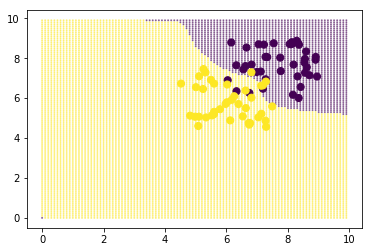

In [258]:
plt.scatter(testx[:,0],testx[:,1],s=1,c=testy,alpha=0.5)
plt.scatter(xtr[:,0],xtr[:,1],s=50,c=y)
plt.show()